### Simple Wandb Tutorial 


    Wandb의 공식 홈페이지의 [QuickStart](https://docs.wandb.ai/quickstart)에 더 자세하고 다양한 내용이 있습니다. 

#### wandb는 data plotting을 해주는 tool이다. 여기서는 다양한 user와 하나의 team project를 만들고 서로의 결과를 공유하는 방법을 알아보자.

    0. wandb에 가입. 그러면 본인의 이메일 주소로 team project에 초대를 받을 수 있다.
    1. wandb를 설치. pip install wandb 로 설치 가능(2021.01.12일 작성시까지 가능했음)
    2. 이 다음부터는 아래 순서대로..

In [1]:
# 설치가 완료되면 import를 하자

import wandb

In [ ]:
# wandb를 쓰기 전에 로그인.
# 아래와 같이 terminal에 입력하자. (참고: project를 wandb 홈페이지에서 생성하면 api key가 나오는데, 그걸로 로그인을 해도 무방)
# 다수의 사용자가 쓰는 서버컴퓨터를 쓰는 경우라면, api key를 복사해놓고 자신이 쓸때는 로그인 하는 것을 잊지 말자. 

wandb login 

In [ ]:
# terminal이 아닌, py 파일에서 wandb login을 처리하고 싶을 때가 있다. (왜냐하면 항상 실행하기 전에, 서버 컴퓨터에서 내 wandb로 login을 해야하는 것이 번거로우므로) 
# 그 때는 다음과 같이 call 함수를 이용하자. (2021.01.12까지 실행 확인)
# 아래 구문을 py파일에 넣으면, 다수의 사용자가 있는 서버를 쓰더라도 login한 wandb project에 기록을 할 수 있다.

from subprocess import call
call(["wandb", "login", "발급받은 API 키 입력"])

In [2]:
import numpy as np
import time

#### 다수의 사용자와 하나의 project를 공유할 때

In [5]:
# 먼저, wandb를 사용하기 위해서는 설정을 initialization해줘야 한다. 그 떄 필요한 변수들은 아래와 같다.

# team 이름
entity = 'teamname' # 처음 team을 만든 사람이 지은 이름이다. 이건 team에 초대한 사람이 알려줘야 함.  

# team 안에 생성된 project이름 (or 생성할 project 이름을 써도 된다. 그러면 새롭게 project가 생성된다)
project_name = 'project name'

# 개인적으로 wandb에 running을 수십번 올리다보면 각 running 기록 이름이 동일해서 헷갈리기 때문에, run 이름앞에 이런 random 숫자를 붙인다.
# 이건 필수적인 것이 아님
run_idx = np.random.randint(10000) 

In [3]:
# 아래는 하나의 예시
# team 이름
entity = 'rl_flip_school_team' # 처음 team을 만든 사람이 지은 이름이다. 이건 team에 초대한 사람이 알려줘야 함.  

# team 안에 생성된 or 생성할 project 이름
project_name = 'actor_critic'

# 개인적으로 wandb에 running을 수십번 올리다보면 이름이 계속 동일해서 헷갈리기 때문에, 항상 run 이름앞에 이런 random 숫자를 붙인다.
run_idx = np.random.randint(10000) 

In [ ]:
# 다음와 같이 initialization을 해야하는데, entity 변수가 맞지 않으면 에러는 안뜨지만 기록이 안되므로 유의할 것.
# 반드시 자신이 초대한 or 초대받은 team 이름을 entity로 지정하자.

wandb.init(
        project=project_name, 
        entity=entity,
        name=f'{run_idx}_AC'
        )

In [ ]:
# wandb.init()을 쓸 때는, config를 잘 활용하면 매우 유용하다.
# 아래처럼 config를 지정해주면, 각 hyperparameter로 모든 log를 그룹핑하여 plot된 것을 한번에 확인할 수도 있다.
# config는 적극적으로 활용하는 것을 추천한다.

wandb.init(
        project=project_name,
        name=f"{run_idx}_{running name}",
        config={"env_name": env_name, 
                "input_frame": input_frame,
                "input_dim": input_dim,
                "alpha": alpha,
                "beta": beta,
                "epsilon_for_priority": epsilon_for_priority,
                "initial_std (NoisyNet param)": initial_std,
                "total_training_frames": tot_train_frames,
                "skipped_frame": skipped_frame,
                "gamma": gamma,
                "n_step (Multi-step param)": n_step,
                "buffer_size": buffer_size,
                "update_start_buffer_size": update_start_buffer_size,
                "grad_clip": grad_clip,
                "batch_size": batch_size,
                "update_type": update_type,
                "soft_update_tau": soft_update_tau,
                "learning_rate": learning_rate,
                "target_update_freq (unit:frames)": target_update_freq,
                "behave_update_freq (unit:frames)": behave_update_freq,
                "n_atoms (C51 param)": n_atoms,
                "Vmax (C51 param)": Vmax,
                "Vmin (C51 param)": Vmin
                }
        )

#### wandb에 기록하기

In [ ]:
# wandb에 올리는 것은 무척 간단하다. 
# 다음과 같이 wandb.log를 활용.
# log안에는 dict 객체가 들어간다. key에는 plot되는 그래프의 이름을 넣고, value에는 plot하려는 변수명을 넣어준다.

lists = np.arange(10000)
for i in lists:
    time.sleep(0.5) 
    wandb.log({'Score': i}) 

#### 활용 예시
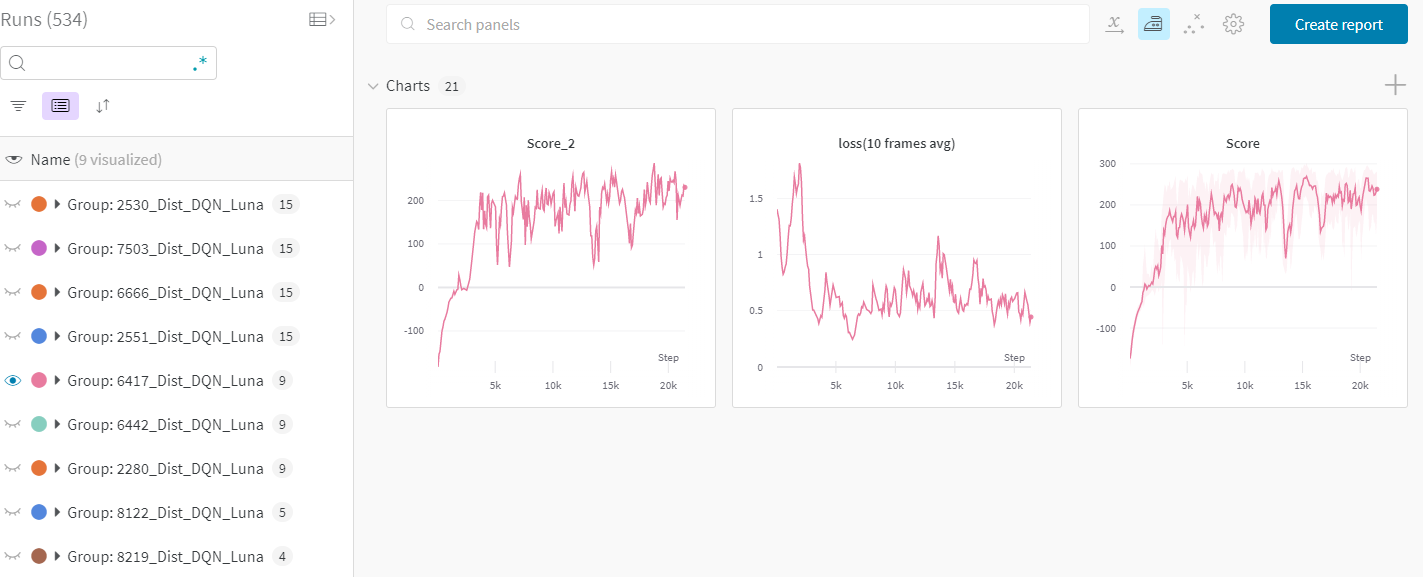